<p><font size="6" color='grey'> <b>

Generative KI. Verstehen. Anwenden. Gestalten.
</b></font> </br></p>

<p><font size="5" color='grey'> <b>
LangChain 101
</b></font> </br></p>

---

In [1]:
#@title 🔧 Umgebung einrichten{ display-mode: "form" }
!uv pip install --system -q git+https://github.com/ralf-42/GenAI.git#subdirectory=04_modul
from genai_lib.utilities import check_environment, get_ipinfo, setup_api_keys, mprint, install_packages, load_chat_prompt_template, mermaid
setup_api_keys(['OPENAI_API_KEY'], create_globals=False)
print()
check_environment()
print()
get_ipinfo()

✓ OPENAI_API_KEY erfolgreich gesetzt

Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

Installierte LangChain- und LangGraph-Bibliotheken:
langchain                                1.1.0
langchain-chroma                         1.0.0
langchain-classic                        1.0.0
langchain-community                      0.4.1
langchain-core                           1.1.0
langchain-ollama                         1.0.0
langchain-openai                         1.1.0
langchain-text-splitters                 1.0.0
langgraph                                1.0.3
langgraph-checkpoint                     3.0.1
langgraph-prebuilt                       1.0.5
langgraph-sdk                            0.2.10

IP-Adresse: 34.56.148.208
Hostname: 208.148.56.34.bc.googleusercontent.com
Stadt: Council Bluffs
Region: Iowa
Land: US
Koordinaten: 41.2619,-95.8608
Provider: AS396982 Google LLC
Postleitzahl: 51502
Zeitzone: America/Chicago


# 1 | Was ist LangChain?
---

LangChain ist ein Framework zur **Entwicklung von Anwendungen mit großen Sprachmodellen** (LLMs). Es vereinfacht die Integration von LLMs in eigene Anwendungen durch:

- Modulare Komponenten für verschiedene Aufgaben
- Vorgefertigte Ketten (Chains) für komplexe Workflows
- Einfache Integration externer Datenquellen
- Werkzeuge für das Speichern von Konversationskontexten



[Einführung](https://python.langchain.com/docs/introduction/)   
[Konzepte](https://python.langchain.com/docs/concepts/)   
[API-References](https://python.langchain.com/api_reference/index.html)   
[Integrations](https://python.langchain.com/docs/integrations/providers/)

---

[Tutorials](https://python.langchain.com/docs/tutorials/)   
[How-to-Guides](https://python.langchain.com/docs/how_to/)   

# 2 | Überblick Konzepte
---




Die Darstellung veranschaulicht das Grundprinzip von LangChain: die Verkettung verschiedener Konzepte zu einem durchgängigen Verarbeitungsprozess, der Eingaben in strukturierte Ausgaben umwandelt.

![My Image](https://raw.githubusercontent.com/ralf-42/GenAI/main/07_image/langchain_prozess_01.png)

Konzepte von LangChain sind grundlegende Bausteine und Prinzipien. Hier sind einige der wichtigsten Konzepte:

+ Nachrichten (**Messages**): Kommunikationseinheiten in Chat-Modellen für Ein- und Ausgabe.
+ Prompt-Vorlagen (**Prompt template**s): Komponenten zur Erstellung strukturierter Prompts für LLMs.
+ Chat-Modelle (**Chat models**): LLMs, die über eine Chat-API verfügbar sind und Sequenzen von Nachrichten verarbeiten.
+ Chains (**Chains**): Verknüpfungen mehrerer LLMs oder anderer Komponenten für komplexere Anwendungen.
+ Strukturierte Ausgabe (**Structured output**): Technik, um Chat-Modelle in strukturierten Formaten antworten zu lassen.
+ Chat-Verlauf (**Chat history**): Eine Sequenz von Nachrichten, die eine Konversation darstellt.
+ Retrieval Augmented Generation (**RAG**): Technik zur Verbesserung von Sprachmodellen durch Kombination mit externen Wissensbasen.
+ Retriever (**Retriever**): Komponenten, die relevante Dokumente aus einer Wissensbasis abrufen.
+ Agenten (**Agents**): Nutzen Sprachmodelle, um Aktionssequenzen auszuwählen und mit externen Ressourcen zu interagieren.
+ Tools (**Tools**): Funktionen mit definierten Schemata für Name, Beschreibung und Argumente.


# 3 | Nachrichten-Typen
---

Beim Einsatz von Large Language Models (LLMs) wie GPT gibt es drei Hauptarten von Nachrichten (Messages), die die Interaktion mit dem Modell steuern. Diese Messages definieren, wie das Modell reagiert, welche Eingaben es erhält und welche Ausgaben es generiert.



**System Message:**   
Die `System Message` dient dazu, das **Verhalten des LLMs** zu steuern. Sie ist eine nicht sichtbare Nachricht, die dem Modell Anweisungen gibt, wie es sich verhalten soll. Dabei kann sie die Persönlichkeit, den Tonfall und die Einschränkungen des Modells beeinflussen. Die Systemnachricht funktioniert wie eine Art "Rollenspiel-Anweisung", um das Modell in eine gewünschte Rolle zu versetzen.

*Merkmale:*
- Definiert, wie das Modell reagieren soll
- Legt Persönlichkeit, Verhalten und Einschränkungen fest
- Wird zu Beginn einer Sitzung gesetzt und bleibt bestehen
- Nicht sichtbar für den Benutzer

*Beispiel einer System Message:*
```json
{
  "role": "system",
  "content": "Du bist ein KI-Assistent, der präzise und informative Antworten in einem professionellen Ton liefert."
}
```
Dieses Beispiel weist das Modell an, in einem professionellen Tonfall kurze und informative Antworten zu geben.

---



**User Message**   
Die `User Message` ist die eigentliche **Eingabe des Benutzer**s. Sie kann eine Frage, eine Aufforderung, kontextrelevanten Inhalt oder ein Befehl sein. Das Modell nutzt diese Nachricht als Ausgangspunkt für die Generierung einer Antwort.

*Merkmale:*
- Direkte Eingabe des Benutzers
- Kann eine Frage, Aufforderung, kontextrelevanten Inhalt oder einen Befehl enthalten
- Basis für die Antwort des Modells

*Beispiel einer User Message:*
```json
{
  "role": "user",
  "content": "Was sind die wichtigsten Unterschiede zwischen KI und maschinellem Lernen?"
}
```
Hier fragt der Benutzer nach den Unterschieden zwischen KI und maschinellem Lernen.

---


**AI Message**   
Die `AI Message` ist die **Antwort, die das Modell generiert**. Sie basiert auf der User Message und den Anweisungen aus der System Message. Die AI Message kann verschiedene Eigenschaften haben, ist aber hauptsächlich auf den Inhalt fokussiert.

*Merkmale:*
- Antwort des Modells auf die Benutzeranfrage
- Kann verschiedene Eigenschaften haben (z. B. Länge, Stil)
- Hauptsächlich inhaltlich relevant

*Beispiel einer AI Message:*
```json
{
  "role": "assistant",
  "content": "Künstliche Intelligenz (KI) ist ein weites Feld, das verschiedene Teilgebiete umfasst, darunter auch das maschinelle Lernen (ML). ML konzentriert sich auf die Erstellung von Modellen, die aus Daten lernen und Vorhersagen treffen."
}
```
Hier gibt das Modell eine inhaltliche Antwort auf die Frage des Benutzers.




**System-Message vs. User-Message**



*System-Message*

**Funktion:** Persistente Verhaltensregeln über verschiedene Aufgaben hinweg

**Enthält:**
- Identität & Rolle des Modells
- Grundsätzliche Methodik & Denkansatz
- Durchgängige Qualitätsstandards
- Tool-/Methodenkompetenz
- Generische Few-Shot-Examples

**Metapher:** Das Betriebssystem – selten verändert, verhaltensbestimmend





*User-Message*

**Funktion:** Konkrete Aufgabe und spezifischer Kontext für diese Interaktion

**Enthält:**
- Situativer Kontext & Hintergrund
- Klare Aufgabenstellung
- Erwartete Format/Umfang/Detailgrad
- Spezifische Daten & Randbedingungen
- Aufgabenspezifische Verhaltensanpassungen

**Metapher:** Die Arbeitsanweisung – variiert bei jeder Anfrage



**Kurz gefasst**   

+  **System Message** legt die Regeln und das Verhalten des Modells fest.
+ **User Message** stellt eine Anfrage oder einen Befehl.
+ **AI Message** gibt die generierte Antwort basierend auf den vorherigen Nachrichten.




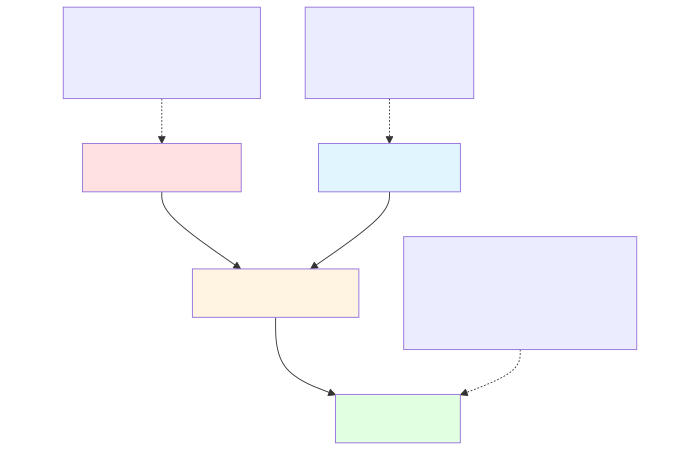

In [2]:
#@markdown   <p><font size="4" color='green'>  🧜‍♀️ Mermaid - Message-Typen Workflow</font> </br></p>

diagram = """
graph TD
    A["System Message"] --> D["LLM Verarbeitung"]
    B["User Message"] --> D
    D --> C["AI Message"]

    A1["Definiert Verhalten<br/>Rolle & Persönlichkeit<br/>Einschränkungen"] -.-> A
    B1["Benutzer-Eingabe<br/>Frage oder Befehl<br/>Kontext"] -.-> B
    C1["Generierte Antwort<br/>Basierend auf System + User<br/>Strukturiertes Format"] -.-> C

    style A fill:#ffe1e1
    style B fill:#e1f5ff
    style C fill:#e1ffe1
    style D fill:#fff4e1
"""
mermaid(diagram, width=700, height=450)

# 4 | Ein einfaches Modell
---


In [3]:
# Importe
from langchain.chat_models import init_chat_model
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate
from langchain_core.prompts.few_shot import FewShotPromptTemplate
from langchain_core.output_parsers.string import StrOutputParser

In [4]:
# Modell definieren (Kurznotation: "provider:model")
llm = init_chat_model("openai:gpt-4o-mini", temperature=0.0)

# 5 | Prompts
---

![My Image](https://raw.githubusercontent.com/ralf-42/GenAI/main/07_image/langchain_prozess_02.png)



Prompts sind die Eingaben bzw. Aufträge an das LLM. LangChain bietet verschiedene Template-Systeme. Ein **Template** ist eine **Vorlage** – genauer gesagt ein Text mit **Platzhaltern**, die später durch echte Werte ersetzt werden.


Ein **PromptTemplate** ist eine Vorlage für einen Eingabetext, der an ein Sprachmodell geschickt wird.
Er enthält Platzhalter `{placeholder}`, die später mit Nutzereingaben oder Kontext befüllt werden.

**Templates machen die KI-Prompts:**

+ Wiederverwendbar (z. B. für viele Themen oder Fragen)

+ Strukturiert (z. B. mit Rollen und Anweisungen)

+ Dynamisch erweiterbar (mit Memory, Tools, etc.)

## 5.1 | Simple Prompt


<p><font color='darkblue' size="4">
<b>❗Hinweis:</b>
</font></p>
Ohne Memory-Management hat das Modell ein kurzes Gedächnis.


**Prompt wird als Zeichenkette übergeben:**

In [5]:
# Aufruf
response = llm.invoke("Was ist Generative KI?")

In [6]:
# Antwort
type(response)

langchain_core.messages.ai.AIMessage

In [7]:
response

AIMessage(content='Generative KI, oder generative künstliche Intelligenz, bezieht sich auf eine Klasse von Algorithmen und Modellen, die in der Lage sind, neue Inhalte zu erzeugen. Diese Inhalte können in verschiedenen Formen vorliegen, darunter Texte, Bilder, Musik, Videos und mehr. Generative KI nutzt oft Techniken des maschinellen Lernens, insbesondere neuronale Netzwerke, um Muster in bestehenden Daten zu erkennen und darauf basierend neue, ähnliche Daten zu generieren.\n\nEin bekanntes Beispiel für generative KI sind Sprachmodelle wie GPT (Generative Pre-trained Transformer), die in der Lage sind, menschenähnliche Texte zu schreiben, Fragen zu beantworten oder Geschichten zu erzählen. In der Bildgenerierung gibt es Modelle wie DALL-E oder Midjourney, die aus Textbeschreibungen Bilder erstellen können.\n\nGenerative KI hat viele Anwendungen, darunter:\n\n1. **Kreative Inhalte**: Erstellung von Kunst, Musik, Literatur und Design.\n2. **Datenaugmentation**: Generierung zusätzlicher T

In [8]:
for r in response:
    print(r)

('content', 'Generative KI, oder generative künstliche Intelligenz, bezieht sich auf eine Klasse von Algorithmen und Modellen, die in der Lage sind, neue Inhalte zu erzeugen. Diese Inhalte können in verschiedenen Formen vorliegen, darunter Texte, Bilder, Musik, Videos und mehr. Generative KI nutzt oft Techniken des maschinellen Lernens, insbesondere neuronale Netzwerke, um Muster in bestehenden Daten zu erkennen und darauf basierend neue, ähnliche Daten zu generieren.\n\nEin bekanntes Beispiel für generative KI sind Sprachmodelle wie GPT (Generative Pre-trained Transformer), die in der Lage sind, menschenähnliche Texte zu schreiben, Fragen zu beantworten oder Geschichten zu erzählen. In der Bildgenerierung gibt es Modelle wie DALL-E oder Midjourney, die aus Textbeschreibungen Bilder erstellen können.\n\nGenerative KI hat viele Anwendungen, darunter:\n\n1. **Kreative Inhalte**: Erstellung von Kunst, Musik, Literatur und Design.\n2. **Datenaugmentation**: Generierung zusätzlicher Trainin

In [9]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Generative KI, oder generative künstliche Intelligenz, bezieht sich auf eine Klasse von Algorithmen und Modellen, die in der Lage sind, neue Inhalte zu erzeugen. Diese Inhalte können in verschiedenen Formen vorliegen, darunter Texte, Bilder, Musik, Videos und mehr. Generative KI nutzt oft Techniken des maschinellen Lernens, insbesondere neuronale Netzwerke, um Muster in bestehenden Daten zu erkennen und darauf basierend neue, ähnliche Daten zu generieren.

Ein bekanntes Beispiel für generative KI sind Sprachmodelle wie GPT (Generative Pre-trained Transformer), die in der Lage sind, menschenähnliche Texte zu schreiben, Fragen zu beantworten oder Geschichten zu erzählen. In der Bildgenerierung gibt es Modelle wie DALL-E oder Midjourney, die aus Textbeschreibungen Bilder erstellen können.

Generative KI hat viele Anwendungen, darunter:

1. **Kreative Inhalte**: Erstellung von Kunst, Musik, Literatur und Design.
2. **Datenaugmentation**: Generierung zusätzlicher Trainingsdaten für maschinelles Lernen.
3. **Simulationen**: Erzeugung realistischer Szenarien für Training und Forschung.
4. **Personalisierung**: Anpassung von Inhalten an individuelle Nutzerpräferenzen.

Die Technologie wirft jedoch auch ethische und rechtliche Fragen auf, insbesondere in Bezug auf Urheberrecht, Fälschungen und die potenzielle Verbreitung von Fehlinformationen.

In [10]:
# Aufruf
response = llm.invoke("Was war meine letzte Frage?")

In [11]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Es tut mir leid, aber ich kann keine vorherigen Interaktionen oder Fragen speichern oder abrufen. Wenn du mir deine Frage erneut stellst, helfe ich dir gerne weiter!

**Prompt wird als formatierte String-Variable übergeben:**

In [12]:
# f-String für simple prompt mit template
thema = "Machine Learning"
prompt = f"Erkläre {thema} in einfachen Worten."

In [13]:
# Aufruf
response = llm.invoke(prompt)

In [14]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Machine Learning, oder maschinelles Lernen, ist ein Teilbereich der Künstlichen Intelligenz, der es Computern ermöglicht, aus Daten zu lernen und Muster zu erkennen, ohne dass sie dafür explizit programmiert werden müssen. 

Stell dir vor, du hast viele Bilder von Katzen und Hunden. Anstatt einem Computer genau zu sagen, wie eine Katze oder ein Hund aussieht, zeigst du ihm einfach viele Beispiele. Der Computer analysiert diese Bilder und lernt, die Unterschiede zwischen Katzen und Hunden zu erkennen. 

Wenn du ihm dann ein neues Bild zeigst, kann er basierend auf dem, was er gelernt hat, vorhersagen, ob es sich um eine Katze oder einen Hund handelt. 

Zusammengefasst: Machine Learning ist wie das Lernen eines Menschen – je mehr Informationen und Erfahrungen er hat, desto besser kann er Entscheidungen treffen oder Vorhersagen machen.

**Prompt wird als template übergeben:**

In [15]:
# Einfaches Template mit Platzhaltern
simple_prompt_template = PromptTemplate.from_template(
    "Erkläre {thema} in einfachen Worten."
)

In [16]:
# Prompt-Erstellung
thema = "Generative KI"
prompt = simple_prompt_template.format(thema=thema)
prompt

'Erkläre Generative KI in einfachen Worten.'

In [17]:
# Aufruf
response = llm.invoke(prompt)

In [18]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Generative KI ist eine Art von künstlicher Intelligenz, die in der Lage ist, neue Inhalte zu erstellen. Das können Texte, Bilder, Musik oder sogar Videos sein. Sie funktioniert, indem sie aus großen Mengen von Daten lernt, wie bestimmte Inhalte aussehen oder klingen. 

Stell dir vor, du hast viele Bilder von Katzen und Hunden. Eine generative KI kann dann lernen, wie diese Tiere aussehen, und neue Bilder von Katzen oder Hunden erstellen, die es so noch nicht gibt. 

Im Grunde genommen ist generative KI wie ein kreativer Computer, der neue Ideen und Inhalte basierend auf dem, was er gelernt hat, entwickeln kann.

## 5.2 | ChatPromptTemplate 📌

Das **ChatPromptTemplate** ist eine spezielle Prompt-Vorlage für Chatmodelle (z. B. GPT-3.5, GPT-4), die **mehrere Rollen und Nachrichten** unterstützt – also genau das, was Chat-Modelle eigentlich brauchen.

Es gehört zur LangChain-Bibliothek und baut auf dem Prinzip auf:


**Wer sagt was? → system, user, assistant, etc.**

In LangChain unterstützte Rollen:

+ "system" - für Systemnachrichten
+ "assistant" oder "ai" - für Assistenten-/KI-Antworten
+ "user" oder "human" - für Benutzernachrichten

<p><font color='black' size="5">
Variante 1: Liste & Tupel 📌
</font></p>

In [19]:
# Template als Liste & Tupel
chat_template = ChatPromptTemplate.from_messages([
    ("system", "{system_prompt}"),
    ("human", "Erkläre mir {thema}"),
])

In [20]:
# Variablen zuweisen
system_prompt = "Du bist ein hilfreicher und humorvoller Assistent."
thema = "Machine Learning"

In [21]:
# Template & Variablen kombinieren
prompt = chat_template.format_messages(system_prompt=system_prompt, thema=thema)

In [22]:
# Sprachmodell aufrufe
response = llm.invoke(prompt)

In [23]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Klar, ich erkläre dir gerne Machine Learning! 

Machine Learning (ML) ist ein Teilbereich der Künstlichen Intelligenz (KI), der es Computern ermöglicht, aus Daten zu lernen und Muster zu erkennen, ohne explizit programmiert zu werden. Man könnte sagen, es ist wie das Lernen eines neuen Hobbys – je mehr du übst, desto besser wirst du darin!

Hier sind die grundlegenden Konzepte:

1. **Daten**: Machine Learning benötigt Daten, um zu lernen. Das können Bilder, Texte, Zahlen oder sogar Töne sein. Je mehr qualitativ hochwertige Daten du hast, desto besser kann das Modell lernen.

2. **Modelle**: Ein ML-Modell ist wie ein Rezept. Es nimmt die Daten und „lernt“ daraus, um Vorhersagen oder Entscheidungen zu treffen. Es gibt verschiedene Arten von Modellen, je nach Aufgabe, wie z.B. Entscheidungsbäume, neuronale Netze oder Support Vector Machines.

3. **Training**: Das Training ist der Prozess, bei dem das Modell aus den Daten lernt. Man zeigt dem Modell Beispiele und sagt ihm, was richtig oder falsch ist. Es ist ein bisschen so, als würde man einem Hund Tricks beibringen – man zeigt ihm, was er tun soll, und belohnt ihn, wenn er es richtig macht.

4. **Testen**: Nach dem Training wird das Modell mit neuen, unbekannten Daten getestet, um zu sehen, wie gut es gelernt hat. Hier zeigt sich, ob das Modell wirklich „verstanden“ hat oder ob es nur auswendig gelernt hat.

5. **Anwendung**: Wenn das Modell gut funktioniert, kann es in der realen Welt eingesetzt werden, z.B. für Spracherkennung, Bildklassifikation oder sogar für Empfehlungen in Online-Shops.

Und das Beste daran? Machine Learning kann sich ständig verbessern, je mehr Daten es erhält. Es ist wie ein Schüler, der nie aufhört zu lernen – und das kann manchmal ganz schön chaotisch werden!

Wenn du noch spezifischere Fragen hast oder mehr über einen bestimmten Aspekt wissen möchtest, lass es mich wissen!

**... oder ...**

<p><font color='black' size="5">
Variante 2: Liste & Dictionary
</font></p>

In [24]:
# Template als Liste & Dictionary
chat_template = ChatPromptTemplate.from_messages([
    {"role": "system", "content": "Du bist ein hilfreicher und humorvoller Assistent."},
    {"role": "human", "content": "Erkläre mir {thema}"},
])

In [25]:
# Variablen zuweisen
system_prompt = "Du bist ein hilfreicher und humorvoller Assistent."
thema = "Machine Learning"

In [26]:
# Template & Variablen kombinieren
prompt = chat_template.format_messages(system_prompt=system_prompt, thema=thema)

In [27]:
# Sprachmodell aufrufe
response = llm.invoke(prompt)

In [28]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Klar, ich erkläre dir gerne Machine Learning! 

Stell dir vor, du hast einen Hund, der nicht weiß, wie man „Sitz“ macht. Du zeigst ihm immer wieder, was er tun soll, und wenn er es richtig macht, gibst du ihm ein Leckerli. Nach einer Weile lernt der Hund, dass „Sitz“ bedeutet, sich hinzusetzen, um das Leckerli zu bekommen. Das ist im Grunde genommen, wie Machine Learning funktioniert!

Machine Learning (ML) ist ein Teilbereich der Künstlichen Intelligenz (KI), bei dem Computer aus Daten lernen, ohne explizit programmiert zu werden. Anstatt einem Computer genau zu sagen, was er tun soll, geben wir ihm viele Beispiele (Daten), und er findet selbst Muster und Zusammenhänge.

Hier sind die grundlegenden Schritte:

1. **Daten sammeln**: Du brauchst eine Menge Daten, die relevant für das Problem sind, das du lösen möchtest. Das können Bilder, Texte, Zahlen oder alles Mögliche sein.

2. **Modell wählen**: Du wählst ein Modell aus, das die Daten analysieren soll. Das kann ein einfacher Algorithmus sein oder ein komplexes neuronales Netzwerk.

3. **Training**: Das Modell wird mit den gesammelten Daten trainiert. Es lernt, indem es die Daten analysiert und versucht, Vorhersagen zu treffen. Wenn es falsch liegt, wird es angepasst, um beim nächsten Mal besser zu sein.

4. **Testen**: Nach dem Training testest du das Modell mit neuen, unbekannten Daten, um zu sehen, wie gut es funktioniert.

5. **Anpassen und Optimieren**: Je nach den Ergebnissen kannst du das Modell weiter anpassen, um die Genauigkeit zu verbessern.

Machine Learning wird in vielen Bereichen eingesetzt, von der Spracherkennung über Bildverarbeitung bis hin zu Empfehlungen in Online-Shops. Es ist wie ein sehr kluger Hund, der immer besser wird, je mehr er lernt!

Wenn du noch mehr Details oder spezifische Beispiele möchtest, sag einfach Bescheid! 🐶💻


<p><font color='black' size="5">
Vergleich: f-string vs. PromptTemplate vs. ChatPromptTemplate
</font></p>



| Vorteil                      | `f-string` (Python)           | `PromptTemplate`              | `ChatPromptTemplate`            |
| ---------------------------- | ----------------------------- | ----------------------------- | ------------------------------- |
| 🚻 Rollenstruktur            | ❌ Keine Unterstützung         | ❌ Nur einfacher Text          | ✅ Klar: `system`, `user`, `ai`  |
| 📚 Konversationsaufbau       | ❌ Nicht geeignet              | ❌ Nicht geeignet              | ✅ Ideal für Multi-Turn-Dialoge <br>    (mehreren Gesprächsrunden)  |
| 🔄 Kombinierbar mit `Memory` | ❌ Nein                        | ❌ Nein                        | ✅ Ja, via `MessagesPlaceholder` |
| 🔌 Für Chatmodelle wie GPT   | ⚠️ Manuell als String         | ⚠️ Nur als Fließtext          | ✅ Nativ & strukturiert          |
| 🔍 Klarheit & Wartbarkeit    | ⚠️ Inline, schwer erweiterbar | ⚠️ Nur Inline-Text            | ✅ Saubere Message-Trennung      |
| 🧪 Prompt-Testbarkeit        | ❌ Keine Validierung           | ⚠️ Eingeschränkt               | ✅ Besser strukturiert           |
| ⚡ Performance                | ✅ Schnell & direkt            | ✅ Schnell                     | ✅ Schnell                       |
| 🔧 Validierung von Variablen | ❌ Keine                       | ✅ Automatisch                 | ✅ Automatisch                   |
| 🧩 Wiederverwendbarkeit      | ❌ Eingeschränkt               | ✅ Als Template-Objekt         | ✅ Als Template-Objekt           |
| 📝 Partial Variables         | ❌ Nein                        | ✅ Ja                          | ✅ Ja                            |
| 🔀 Chains & Pipelines        | ❌ Nicht integrierbar          | ✅ LangChain-kompatibel        | ✅ LangChain-kompatibel          |
| 🎯 Output Parser             | ❌ Manuell                     | ✅ Integrierbar                | ✅ Integrierbar                  |



**Anwendungsempfehlungen**

| Methode               | Wann verwenden?                                                                 |
| --------------------- | ------------------------------------------------------------------------------- |
| **f-string**          | Einfache, einmalige Prompts · Prototyping & schnelle Tests · Keine LangChain-Integration |
| **PromptTemplate**    | Single-Turn Prompts mit Variablen · Completion-Modelle (GPT-3, etc.) · Keine Konversation |
| **ChatPromptTemplate** | Multi-Turn Dialoge · Chat-Modelle (GPT-4, Claude, etc.) · Komplexe Konversationen mit Memory |


## 5.3 | Few-Shot Prompt ✳️


Few-Shot-Prompting ist eine Technik, bei der man einem KI-Modell einige Beispiele (sogenannte "Shots") vorlegt, bevor es eine neue Aufgabe lösen soll. Das Modell kann aus diesen Beispielen das Muster erkennen und auf neue, ähnliche Fälle anwenden.

`FewShotPromptTemplate` ist eine Prompt-Vorlage, die automatisch mehrere Beispiele einfügt, bevor das eigentliche Nutzer-Input kommt.

In [29]:
beispiele = [
    {"frage": "Was ist Python?", "antwort": "Eine interpretierende Programmiersprache."},
    {"frage": "Was ist Java?", "antwort": "Eine objektorientierte Sprache."}
]

In [30]:
beispiel_prompt_template = PromptTemplate.from_template(
    "Frage: {frage}\nAntwort: {antwort}"
)

In [31]:
system_prompt = "Du bist ein Assistent, der Fragen zu Programmiersprachen beantwortet. Halte deine Antworten kurz und präzise:"

In [32]:
# Few-Shot-Prompt
few_shot_prompt_template = FewShotPromptTemplate(
    examples=beispiele,
    example_prompt=beispiel_prompt_template,
    prefix=system_prompt,
    suffix="Frage: {frage}\nAntwort:",
    input_variables=["frage"]
)

prompt = few_shot_prompt_template.format(frage="Was ist Go?")

**Struktur des finalen Prompts:**

```
[prefix]
[formatiertes Beispiel 1]
[formatiertes Beispiel 2]
...
[suffix mit aktueller Frage]
```



In [33]:
response = llm.invoke(prompt)

In [34]:
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

Eine kompilierte Sprache, die für Effizienz und Parallelität entwickelt wurde.

**Vorteile eines `FewShotPromptTemplate`**

| Vorteil                      | Beschreibung                                                      |
| ---------------------------- | ----------------------------------------------------------------- |
| 🧠 Lerneffekt für das Modell | Das Modell erkennt aus Beispielen, wie es antworten soll          |
| 🧰 Flexibilität              | Beispiele können dynamisch gesetzt oder generiert werden          |
| 🧱 Struktur & Konsistenz     | Einheitlicher Aufbau aller Beispiele über `example_prompt`        |
| 🪄 Kein Training nötig       | Kein Fine-Tuning – nur durch Prompting                            |
| 🛠 Kombinierbar              | Kann mit Templates, Tools, Chains, OutputParser kombiniert werden |


## 5.4 | Eigenes Prompt-Template 📌

Die `load_chat_prompt_template()` Funktion aus der `genai_lib.utilities` ermöglicht das Laden von Prompt-Templates direkt von GitHub oder aus lokalen Dateien.

**Vorteile:**
- Zentrale Verwaltung von Prompts im `05_prompt/` Verzeichnis
- Wiederverwendbarkeit über mehrere Notebooks hinweg
- Versionskontrolle durch Git
- Einfaches Teilen von Best-Practice-Prompts

**Hinweis:** In Google Colab muss die GitHub-URL verwendet werden, da lokale Pfade nicht verfügbar sind.

**Template-Struktur (`05_prompt/text_zusammenfassung.py`):**

```python
# Prompt Template als Python-Datei
messages = [
    (
        "system",
        "Du bist ein Experte für die Erstellung prägnanter Textzusammenfassungen..."
    ),
    (
        "human",
        "Bitte fasse den folgenden Text zusammen:\n\n{text}\n\n..."
    )
]
```

**Wichtig:** Templates müssen als **Python-Dateien (.py)** erstellt werden und eine Variable `messages` definieren, die eine Liste von Tupeln mit `(role, content)` enthält.

In [35]:
from genai_lib.utilities import load_chat_prompt_template

# Template von GitHub laden
url = "https://github.com/ralf-42/GenAI/blob/main/05_prompt/text_zusammenfassung.py"
chat_template = load_chat_prompt_template(url)

# Template mit Beispieltext testen
beispiel_text = """
LangChain ist ein Framework zur Entwicklung von Anwendungen mit großen Sprachmodellen (LLMs).
Es bietet modulare Komponenten für verschiedene Aufgaben, vorgefertigte Ketten für komplexe
Workflows und eine einfache Integration externer Datenquellen. Mit LangChain können Entwickler
Chat-Modelle, Embeddings, Vektordatenbanken und Agents effizient kombinieren, um
leistungsstarke KI-Anwendungen zu erstellen.
"""

# Prompt mit Variablen füllen
prompt = chat_template.format_messages(text=beispiel_text)

# Aufruf
response = llm.invoke(prompt)

In [36]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)

## 📣 Model response:

---

LangChain ist ein Framework zur Entwicklung von Anwendungen mit großen Sprachmodellen (LLMs), das modulare Komponenten und vorgefertigte Ketten für komplexe Workflows bietet. Es ermöglicht eine einfache Integration externer Datenquellen und die effiziente Kombination von Chat-Modellen, Embeddings, Vektordatenbanken und Agents. Dadurch können Entwickler leistungsstarke KI-Anwendungen erstellen.

# 6 | Weitere Modelle 📌
---

LangChain ist mit zahlreichen LLMs – sowohl eines als auch verschiedener Anbieter – kompatibel und bietet vielseitige Konfigurationsoptionen für individuelle Anwendungsfälle.

**Beispiel `gpt-4o` und `gpt-5-mini`**

+ gpt-4o:    
gpt-4o ist ein multimodales KI-Modell von OpenAI, das Text- und Bildeingaben verarbeiten kann und sich durch hohe Geschwindigkeit sowie eine natürliche, menschenähnliche Interaktion auszeichnet – ideal für alltägliche Konversationen, kreative Aufgaben und allgemeine Chatanwendungen
+ gpt-5-mini:     
gpt-5-mini ist die mittlere Modellvariante der GPT-5-Familie, die ein ausgewogenes Verhältnis zwischen Leistungsfähigkeit und Kosten bietet und für alltägliche Aufgaben, allgemeine Automatisierung sowie kostengünstige Anwendungen im großen Maßstab optimiert wurde

In [37]:
# Modelle konfigurieren (Kurznotation: "provider:model")
chat_model = init_chat_model("openai:gpt-4o")
resoning_model = init_chat_model("openai:gpt-5-mini")

In [38]:
# Gemeinsamer simple prompt
prompt = "Was ist der Unterschied zwischen Prompting und Retrieval-Augmented-Generation?"

In [39]:
# Aufruf
response = chat_model.invoke(prompt)

In [40]:
mprint("## 📣 Chat-Model:")
mprint("---")
mprint(response.content)

## 📣 Chat-Model:

---

Prompting und Retrieval-Augmented Generation (RAG) sind zwei verschiedene Ansätze im Bereich der Verarbeitung natürlicher Sprache, die oft mit großen Sprachmodellen zusammenarbeiten, aber sie dienen unterschiedlichen Zwecken und haben unterschiedliche Mechanismen.

### Prompting:
- **Definition**: Prompting bezieht sich darauf, wie man ein Sprachmodell dazu bringt, bestimmte Arten von Antworten zu generieren. Es bedeutet im Grunde, eine Eingabe (Prompt) zu formulieren, die das Modell dazu bringt, die gewünschte Ausgabe zu erzeugen.
- **Anwendung**: Einfache Formen des Promptings beinhalten das direkte Stellen von Fragen oder das Vorgeben von Anweisungen, um einen bestimmten Kontext oder eine bestimmte Art von Antwort zu erhalten. Dies kann von einfachen Eingabeaufforderungen bis hin zu komplexeren, kontextreichen Szenarien reichen.
- **Vorteil**: Prompting ist direkt und unkompliziert, oft sehr nützlich für Interaktionen, die eine schnelle und einfache Antwort erfordern.
- **Limitierung**: Der Erfolg hängt stark von der Formulierung der Eingabeaufforderung ab, und das Modell hat keinen Zugriff auf externe Informationen außer dem, was in seinen Trainingsdaten enthalten ist.

### Retrieval-Augmented Generation (RAG):
- **Definition**: RAG kombiniert die Fähigkeit von Sprachmodellen, Sprache zu generieren, mit einem Informationsabrufsystem, das externe Datenquellen durchsucht, um die Generierung zu verbessern.
- **Prozess**:
  1. **Retrieval-Phase**: Ein Abrufmodul durchsucht eine große Sammlung von Dokumenten, um die relevantesten Informationen basierend auf der Eingabe zu finden.
  2. **Generation-Phase**: Das Sprachmodell verwendet diese abgerufenen Informationen, um eine fundiertere und präzisere Antwort zu generieren.
- **Vorteil**: RAG kann genauere und aktuellere Informationen liefern, da es auf externe Wissensquellen zurückgreift, anstatt sich ausschließlich auf die im Modell gespeicherten Informationen zu verlassen.
- **Limitierung**: Die Leistung hängt von der Qualität der Suchalgorithmen und der Verfügbarkeit relevanter, aktueller Daten ab.

Zusammenfassend lässt sich sagen, dass Prompting mehr auf die Formulierung der Eingabe an das Modell abzielt, während RAG den Prozess erweitert, indem es das Modell mit zusätzlichen, aktuelleren Informationen aus externen Quellen versorgt, um die Generierung zu verbessern.

In [41]:
# Aufruf
response = resoning_model.invoke(prompt)

In [42]:
mprint("## 📣 Reasoning-Model:")
mprint("---")
mprint(response.content)

## 📣 Reasoning-Model:

---

Kurzfassung
- Prompting: Du stellst einer großen Sprach‑KI (LLM) direkt eine Eingabe (Prompt) und sie erzeugt darauf eine Ausgabe nur aus ihrem internen Wissen und ihren Trainingsmustern.
- Retrieval‑Augmented Generation (RAG): Die KI holt zuerst relevante externe Dokumente (Retrieval) und nutzt diese als Kontext, um die Antwort zu generieren (Generation). Dadurch wird die Ausgabe an aktuelle oder private Quellen „geerdet“.

Definitionen und Ablauf
- Prompting
  - Definition: Formular von Interaktion mit einem LLM durch gut gestaltete Eingabe (z. B. Zero‑/Few‑Shot, Instruktions‑Prompts, Chain‑of‑Thought).
  - Ablauf: Prompt → LLM → Antwort (nur Modellwissen).
  - Beispiel: „Erkläre Quantenverschränkung für Studierende im ersten Semester.“

- RAG
  - Definition: Kombination aus Such-/Retrieval‑Komponente und einem generativen Modell. Der Retriever liefert relevante Textpassagen (z. B. aus Dokumenten, Datenbanken, Web), die dann als Kontext im Prompt verwendet werden.
  - Ablauf: Anfrage → Retriever (BM25 / Vektor‑Embeddings) findet Dokumente → Dokumente + Anfrage → Generator (LLM) → Antwort (ggf. mit Zitaten).
  - Beispiel: Nutzerfrage zur Firmenrichtlinie → System sucht interne Handbuchseiten → LLM erstellt Antwort mit Referenz auf die gefundenen Abschnitte.

Wesentliche Unterschiede
- Datenquelle: Prompting nutzt nur das im Modell gespeicherte Wissen; RAG nutzt zusätzlich externe, aktuelle oder private Daten.
- Grounding/Faithfulness: RAG kann Antworten besser belegen und Halluzinationen reduzieren (abhängig von Retriever‑Qualität). Prompting kann stärker halluzinieren, besonders bei Faktenfragen.
- Aktualität: RAG erlaubt Zugriff auf aktuelle Informationen; reines Prompting ist limitiert durch das Trainingsdatum.
- Architektur: Prompting ist einfacher (nur LLM + Prompt); RAG benötigt Index, Retriever, ggf. Embedding‑Modelle und Orchestrierung.
- Kosten & Latenz: RAG hat zusätzlichen Kostenaufwand (Indexierung, Retrieval) und Latenz, kann aber Gesamtkosten reduzieren, weil kürzere generative Prompts oder spezialisierte Modelle genutzt werden.
- Datenschutz: RAG erlaubt gezielten Zugriff auf private Datenquellen, kontrollierbar durch Indexzugriffsrechte.

Vor‑ und Nachteile (knapp)
- Prompting
  - + Einfach zu implementieren, schnell für kreative/konversationelle Aufgaben.
  - − Schlechter bei aktuellen/private Fakten, höhere Halluzinationsgefahr bei Detailfragen.
- RAG
  - + Bessere Faktentreue, Zugriff auf aktuelle und private Inhalte, Zitation möglich.
  - − Komplexer aufzubauen, höhere Infrastrukturkosten und Latenz.

Wann welches wählen?
- Prompting: kreative Texte, Sprachstil, generelle Erklärungen, wenn Modellwissen + kein externer Kontext ausreichend sind.
- RAG: Fragen zu firmenspezifischen Dokumenten, aktuelle Fakten, Compliance, wenn Belege/Zitate nötig sind oder das Modell veraltetes Wissen hat.
- Hybrid: Oft am sinnvollsten — gutes Prompting innerhalb des RAG‑Workflows (der Generator wird durch Retrieval kontextualisiert).

Kurze Best Practices
- Für Prompting: klare Instruktionen, Few‑Shot‑Beispiele, Temperatursteuerung, evtl. Chain‑of‑Thought nur zur Erklärung verwenden.
- Für RAG: qualitativ guten Retriever (Embeddings + Faiss/Annoy oder BM25), Relevanzfeedback, Prompt‑Template für Kontext‑Injektion (z. B. Dokumente zuerst, dann Frage), Quellenangaben in der Ausgabe, Fallback wenn keine relevanten Dokumente gefunden wurden.

Wenn du magst, kann ich dir ein konkretes Beispiel zeigen (Prompt vs. RAG) mit echten Textschnipseln oder eine Architektur‑Skizze für eine RAG‑Pipeline.

**📊 Vergleich: Chat-Modell vs. Reasoning-Modell**

| **Aspekt**                      | **Chat-Modell**                                                           | **Reasoning-Modell**                                                                                |
| ------------------------------- | ------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------- |
| **Stil**                        | Erklärend, klassisch strukturiert mit Fließtext                           | Punktuell, technisch und systematisch                                                               |
| **Formatierung**                | Fließtext mit Absätzen und Beispielen                                     | Aufzählungen (•) und strukturierte Unterpunkte                                                      |
| **Definition Prompting**        | Kurze Definition als Text, danach Beispiel                                | Technisch klar: „parametrisches Wissen“, Rolle der Prompt-Formulierung betont                       |
| **Definition RAG**              | Fließtext-Erklärung mit Ablaufbeschreibung und Beispiel                   | Detaillierte Schritte: Abruf, Kontextintegration, Vorteile bzgl. Aktualität und Präzision erläutert |
| **Beispiele**                   | Ja – einfache, praxisnahe Beispiele (z. B. Klimawandel, Quantencomputing) | Nein – keine konkreten Beispiele, aber kontextbezogene Beschreibung                                 |
| **Vergleich Prompting vs. RAG** | Abstrakte Gegenüberstellung in einem abschließenden Absatz                | Direkter Vergleich im letzten Abschnitt mit Betonung der Wissensquellen                             |
| **Technische Tiefe**            | Mittel – für Einsteiger\:innen gut verständlich                           | Hoch – Begriffe wie „parametrisches Wissen“, Fokus auf Architektur                                  |
| **Zielgruppe**                  | Allgemeines Publikum, Einstieg in das Thema                               | Fortgeschrittene Nutzer\:innen, Technik-affine Leserschaft                                          |
| **Stärken des Modells**         | Klare Erklärung, gute didaktische Struktur                                | Präzise Begriffsabgrenzung, hohe Informationsdichte                                                 |



**📊 Vergleich: Chat-Modelle**

| Model              | Creator    | Open?  | API Name(s) (falls verfügbar)                            | Context Window             |
| ------------------ | ---------- | ------ | -------------------------------------------------------- | -------------------------- |
| **GPT-5**          | OpenAI     | Closed | `gpt-5`, `gpt-5-mini`, `gpt-5-nano`, `gpt-5-chat-latest` | 400K Tokens (~296 Seiten)  |
| **GPT-4.1**        | OpenAI     | Closed | `gpt-4.1`, `gpt-4.1-mini`, `gpt-4.1-nano`                | 1M Tokens (~741 Seiten)    |
| **GPT-4o**         | OpenAI     | Closed | `gpt-4o`, `gpt-4o-mini`                                  | 128K Tokens (~95 Seiten)   |
| **GPT-4 Turbo**    | OpenAI     | Closed | `gpt-4-turbo`, `gpt-4-turbo-2024-04-09`                  | 128K Tokens (~95 Seiten)   |
| **gpt-oss-120b**   | OpenAI     | Open   | —                                                        | 131K Tokens (~97 Seiten)   |
| **gpt-oss-20b**    | OpenAI     | Open   | —                                                        | 131K Tokens (~97 Seiten)   |
| **Claude 4**       | Anthropic  | Closed | `claude-sonnet-4-20250514`, `claude-opus-4-20250514`     | 200K Tokens (~148 Seiten)  |
| **Gemini 2.5 Pro** | Google     | Closed | `gemini-2.5-pro`, `gemini-2.5-pro-exp-03-25`             | 1M Tokens (~741 Seiten)    |
| **Llama 3.1 405B** | Meta       | Open   | —                                                        | 512K Tokens (~379 Seiten)  |
| **DeepSeek-V3**    | DeepSeek   | Open   | —                                                        | 128K Tokens (~95 Seiten)   |
| **Mistral 7B**     | Mistral.AI | Open   | —                                                        | 32K Tokens (~24 Seiten)    |

<br>

*Umrechnung Token/Seiten:  ~1.350 Tokens ≈ 1 Seite deutschsprachiger Text*

<p><font color='black' size="5">

Ein anderer Modell-Provider: `groq`
</font></p>

In [43]:
install_packages([('langchain-groq', 'langchain_groq')])

🔄 Installiere langchain-groq...
✅ langchain-groq erfolgreich installiert und importiert


In [44]:
setup_api_keys(['GROQ_API_KEY'])

✓ GROQ_API_KEY erfolgreich gesetzt


In [45]:
# Kurznotation: "provider:model"
llm_groq = init_chat_model("groq:qwen/qwen3-32b", temperature=0)

In [46]:
response_groq = llm_groq.invoke("Wer war Albert Einstein? Bitte antworte in deutscher Sprache.")

In [47]:
mprint(response_groq.content)

<think>
Okay, the user is asking who Albert Einstein was and wants the answer in German. Let me start by recalling the basics. Einstein was a physicist, right? He's famous for the theory of relativity. I should mention his birth and death dates. He was born in 1879 in Germany and died in 1955 in the US. He won the Nobel Prize in Physics in 1921, but I need to remember the exact reason. Oh, it was for the photoelectric effect, not relativity. That's a common misconception.

He also contributed to quantum theory and the famous equation E=mc². I should explain that equation briefly. Maybe mention his work on Brownian motion and the photoelectric effect. Also, his role in the Manhattan Project, though he was against the use of atomic weapons. He was a pacifist and civil rights advocate. His later years were in Princeton, and he worked on a unified field theory. Need to make sure the dates and facts are correct. Let me check the Nobel Prize year again—yes, 1921. Also, he emigrated to the US in 1933 due to the rise of the Nazis. 

I should structure the answer in German, starting with his full name, birth and death, nationality, main contributions, Nobel Prize, and his other activities. Keep it concise but informative. Avoid technical jargon but include key terms like "Relativitätstheorie" and "Energie-Masse-Äquivalenz". Make sure to highlight his impact on physics and his humanitarian efforts. Double-check any names or terms in German to ensure accuracy. For example, "photoelectric effect" is "Photoeffekt" in German. Also, mention his Swiss and American citizenships. Alright, that should cover the main points without being too lengthy.
</think>

Albert Einstein (*14. März 1879 in Ulm; † 18. April 1955 in Princeton, New Jersey) war ein deutscher Physiker, der später Schweizer und US-amerikanischer Staatsbürger wurde. Er gilt als einer der einflussreichsten Wissenschaftler des 20. Jahrhunderts.  

Einstein ist vor allem für seine **Relativitätstheorie** bekannt, die er in zwei Teilen entwickelte:  
1. **Spezielle Relativitätstheorie (1905)**: Erklärte, dass Raum und Zeit relativ zum Beobachter sind und die Lichtgeschwindigkeit konstant bleibt.  
2. **Allgemeine Relativitätstheorie (1915)**: Beschrieb die Gravitation als Krümmung der Raumzeit durch Masse und Energie.  

Zu seinen weiteren bahnbrechenden Beiträgen gehörten:  
- Die Erklärung des **Photoeffekts** (1905), für die er 1921 den **Nobelpreis für Physik** erhielt.  
- Die Formel **E = mc²**, die die Äquivalenz von Masse und Energie beschreibt.  
- Die Theorie der **Brown’schen Bewegung**, die die Existenz von Atomen bestätigte.  

Einstein war auch ein engagierter Pazifist und Vorkämpfer für die Bürgerrechte. Er floh 1933 vor dem NS-Regime nach Princeton (USA), wo er bis zu seinem Tod lebte. Seine Arbeit prägte die moderne Physik grundlegend und beeinflusste Bereiche wie Astrophysik, Kosmologie und Quantenmechanik.

<p><font color='black' size="5">
Modelle mit Reasoning/Chain-of-Thought
</font></p>

In [50]:
from genai_lib.utilities import extract_thinking
thinking, answer = extract_thinking(response_groq)

mprint("### Thinking:")
mprint("---")
mprint(thinking)
mprint("### Answer:")
mprint("---")
mprint(answer)

### Thinking:

---

Okay, the user is asking who Albert Einstein was and wants the answer in German. Let me start by recalling the basics. Einstein was a physicist, right? He's famous for the theory of relativity. I should mention his birth and death dates. He was born in 1879 in Germany and died in 1955 in the US. He won the Nobel Prize in Physics in 1921, but I need to remember the exact reason. Oh, it was for the photoelectric effect, not relativity. That's a common misconception.

He also contributed to quantum theory and the famous equation E=mc². I should explain that equation briefly. Maybe mention his work on Brownian motion and the photoelectric effect. Also, his role in the Manhattan Project, though he was against the use of atomic weapons. He was a pacifist and civil rights advocate. His later years were in Princeton, and he worked on a unified field theory. Need to make sure the dates and facts are correct. Let me check the Nobel Prize year again—yes, 1921. Also, he emigrated to the US in 1933 due to the rise of the Nazis. 

I should structure the answer in German, starting with his full name, birth and death, nationality, main contributions, Nobel Prize, and his other activities. Keep it concise but informative. Avoid technical jargon but include key terms like "Relativitätstheorie" and "Energie-Masse-Äquivalenz". Make sure to highlight his impact on physics and his humanitarian efforts. Double-check any names or terms in German to ensure accuracy. For example, "photoelectric effect" is "Photoeffekt" in German. Also, mention his Swiss and American citizenships. Alright, that should cover the main points without being too lengthy.

### Ansqwer:

---

Albert Einstein (*14. März 1879 in Ulm; † 18. April 1955 in Princeton, New Jersey) war ein deutscher Physiker, der später Schweizer und US-amerikanischer Staatsbürger wurde. Er gilt als einer der einflussreichsten Wissenschaftler des 20. Jahrhunderts.  

Einstein ist vor allem für seine **Relativitätstheorie** bekannt, die er in zwei Teilen entwickelte:  
1. **Spezielle Relativitätstheorie (1905)**: Erklärte, dass Raum und Zeit relativ zum Beobachter sind und die Lichtgeschwindigkeit konstant bleibt.  
2. **Allgemeine Relativitätstheorie (1915)**: Beschrieb die Gravitation als Krümmung der Raumzeit durch Masse und Energie.  

Zu seinen weiteren bahnbrechenden Beiträgen gehörten:  
- Die Erklärung des **Photoeffekts** (1905), für die er 1921 den **Nobelpreis für Physik** erhielt.  
- Die Formel **E = mc²**, die die Äquivalenz von Masse und Energie beschreibt.  
- Die Theorie der **Brown’schen Bewegung**, die die Existenz von Atomen bestätigte.  

Einstein war auch ein engagierter Pazifist und Vorkämpfer für die Bürgerrechte. Er floh 1933 vor dem NS-Regime nach Princeton (USA), wo er bis zu seinem Tod lebte. Seine Arbeit prägte die moderne Physik grundlegend und beeinflusste Bereiche wie Astrophysik, Kosmologie und Quantenmechanik.

# 7 | Chain 📌
---

Chains verbinden mehrere Komponenten/Bausteine zu einer Verarbeitungskette. LangChain Expression Language (LCEL) ist das **neue Programmiermodell in LangChain v0.3+**, das die Entwicklung von LLM-Anwendungen vereinfacht.



**Hier die Kernpunkte:**

1. Was ist LCEL?
```python
# LCEL nutzt den Pipe-Operator (|) für klare Verkettungen
chain = prompt | model
```
- Eine deklarative Sprache zum Verketten von LangChain-Komponenten
- Ermöglicht linearen Datenfluss zwischen Komponenten
- Basiert auf dem Pipe-Operator (|) für intuitive Verbindungen

2. Warum LCEL nutzen?
- Bessere Lesbarkeit des Codes
- Einfachere Wartung und Debugging
- Verbesserte Performance durch optimierte Ausführung
- Bessere Typsicherheit und Fehlererkennung
- Unterstützt modernes Streaming und Async-Operationen

3. Praktisches Beispiel:

<p><font color='black' size="5">
Simple Chain 📌
</font></p>


In [ ]:
#@markdown   <p><font size="4" color='green'>   Mermaid - LCEL Chain-Komposition</font> </br></p>

diagram = """
graph LR
    A["Input Dictionary<br/>{user_input: ...}"] --> B["Prompt Template"]
    B --> C["Formatierter Prompt<br/>System + Human Message"]
    C --> D["LLM"]
    D --> E["AI Message"]
    E --> F["StrOutputParser"]
    F --> G["String Output"]

    H["chain = prompt | llm | parser"] -.-> B
    H -.-> D
    H -.-> F

    style A fill:#e1f5ff
    style B fill:#fff4e1
    style C fill:#f0f0f0
    style D fill:#ffe1f5
    style E fill:#f0f0f0
    style F fill:#e1ffe1
    style G fill:#f0f0f0
    style H fill:#ffe1e1
"""
mermaid(diagram, width=900, height=250)

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

# 1. Prompt-Template
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher und humorvoller Assistent."),
    ("human", "Erkläre mir {user_input}")
])

# 2. Modell (Kurznotation: "provider:model")
llm = init_chat_model("openai:gpt-4o-mini", temperature=0)

#  3. Einfache LCEL-Kette
chain = prompt | llm

# 4. Ausführung
response = chain.invoke({"user_input": "LangChain Expression Language"})

In [ ]:
mprint("## 📣 Model response:")
mprint("---")
mprint(response.content)


LCEL ist der empfohlene Weg für alle neuen LangChain-Projekte, da es die Entwicklung vereinfacht und zukunftssicher macht.

# 8 | Output-Handling
---

# 8.1 | OutputParser 📌

![My Image](https://raw.githubusercontent.com/ralf-42/GenAI/main/07_image/langchain_prozess_03.png)

Ein OutputParser ist ein Konzept in LangChain, das hilft, die Antworten eines Modells richtig weiterzuverarbeiten. Es nimmt die **rohe Ausgabe** (zum Beispiel einen langen Text) und formt sie in ein **bestimmtes Format**, das später in der Anwendung leichter benutzt werden kann.

<p><font color='black' size="5">
Simple Chain mit Parser 📌
</font></p>

In [ ]:
# 1. Prompt-Template
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher und humorvoller Assistent."),
    ("human", "Erkläre mir {user_input}")
])

# 2. Modell (Kurznotation: "provider:model")
llm = init_chat_model("openai:gpt-4o-mini", temperature=0)

# 3. Parser
parser = StrOutputParser()

# 4. Einfache LCEL-Kette
chain = prompt | llm | parser

# 5. Ausführung
response = chain.invoke({"user_input": "LangChain Expression Language"})

In [ ]:
mprint("## 📣 Model response:")
mprint("---")
mprint(response)

<p><font color='black' size="5">
Simple Chain mit Parser & Format im System-Prompt
</font></p>

In [ ]:
# 1. Einfacher Prompt mit explizite Formatvorgabe
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher Assistent. Formatiere Deine Antwort im json-Format mit den Infos zu Name und Alter."),
    ("human", "{user_input}")
])

# 2. Modell (Kurznotation: "provider:model")
llm = init_chat_model("openai:gpt-4o-mini", temperature=0)

# 3. Parser
parser = StrOutputParser()

# 4. Chain
chain = prompt | llm | parser

# 5. Ausführung
response = chain.invoke({"user_input": "Bitte gibt den Namen einer fiktiven Person und das Alter"})

In [ ]:
# Ausgabe
mprint("## 📣 Model response:")
mprint("---")
mprint(response)

# 8.2 | with_structured_output() ✳️


Im vorherigen Beispielen wurden Formatierung über **System-Prompts** und/oder über einen **OututParser** gesteuert. Das funktioniert, hat aber Nachteile:

- ❌ Keine automatische Validierung (Typen können falsch sein)
- ❌ String-Parsing fehleranfällig
- ❌ Keine Typsicherheit im Code
- ❌ Prompt-Engineering für Format nötig

**Moderne Lösung: `with_structured_output()`**

LangChain 1.0+ bietet eine elegante Lösung: Mit `with_structured_output()` kann man die gewünschte Ausgabestruktur **direkt als Pydantic-Modell** definieren. Das Modell sorgt automatisch für:

- ✅ Validierte, typsichere Ausgaben
- ✅ Automatische Format-Konvertierung
- ✅ Klare Struktur ohne Prompt-Engineering
- ✅ IDE-Unterstützung (Autocomplete, Type-Hints)

<p><font color='black' size="5">
Einfaches Beispiel mit with_structured_output()
</font></p>

In [ ]:
from pydantic import BaseModel, Field

# 1. Pydantic-Modell definiert die gewünschte Struktur
class PersonInfo(BaseModel):
    """Informationen über eine Person"""
    name: str = Field(description="Vollständiger Name der Person")
    alter: int = Field(description="Alter der Person in Jahren")
    beruf: str = Field(description="Aktueller Beruf der Person")

# 2. Modell mit strukturierter Ausgabe (Kurznotation: "provider:model")
llm = init_chat_model("openai:gpt-4o-mini", temperature=0)
structured_llm = llm.with_structured_output(PersonInfo)

# 3. Einfache Anfrage - automatische Formatierung & Validierung
response = structured_llm.invoke(
    "Erstelle eine fiktive Person: Name, Alter und Beruf"
)

# 4. Typsichere Ausgabe - response ist ein PersonInfo-Objekt
print(f"Typ: {type(response)}")
print(f"Name: {response.name}")
print(f"Alter: {response.alter}")
print(f"Beruf: {response.beruf}")

**Vergleich: Prompt-basierte Formatierung vs. StrOutputParser vs. with_structured_output()**

| Aspekt | Prompt-basiert | StrOutputParser | with_structured_output() |
|--------|----------------|----------------|---------------------------|
| **Definition** | Via System-Prompt: „Formatiere im JSON-Format...“ | Expliziter Parser, der LLM-Ausgabe als String extrahiert oder leicht nachbearbeitet | Automatische Strukturierung per Pydantic-Modell (`class PersonInfo(BaseModel)`) |
| **Validierung** | ❌ Keine – Modell kann beliebig antworten | ⚠️ Nur minimale (z. B. String-Cleaning) | ✅ Strikte Schema-Validierung durch Pydantic |
| **Typsicherheit** | ❌ Nur Strings | ❌ Nur Strings | ✅ Typsichere Python-Objekte |
| **Fehlerbehandlung** | ⚠️ Manuelles Parsing und Regex nötig | ⚠️ Begrenzte Kontrolle (nur einfache Parsing-Fehler) | ✅ Automatische Validierung, Exception bei Schemafehlern |
| **Code-Qualität** | ⚠️ Fragil, stark Prompt-abhängig | ✅ Etwas klarer, aber keine echte Struktur | ✅ Robust, wartbar, klar definierte Typen |
| **IDE-Support** | ❌ Keine Autovervollständigung | ❌ Keine | ✅ Vollständig durch Type-Hints |
| **Anwendungsfall** | Einfache oder explorative Ausgaben | Wenn nur reine Textausgabe nötig ist | Für strukturierte, verlässliche Daten (JSON, Objekte) |
| **Lernkurve** | ✅ Sehr einfach | ✅ Einfach | ⚠️ Erfordert Grundkenntnisse in Pydantic und LangChain-Schemas |
| **Beispiel** | „Nenne Name und Alter als JSON.“ | `StrOutputParser().parse(output)` | `llm.with_structured_output(PersonInfo)` |




**Wann welchen Ansatz?**

- **Prompt-basiert**: Für einfache Texte, Zusammenfassungen, kreative Inhalte  
- **StrOutputParser**: Wenn nur reine Textausgabe oder einfache Formatkorrektur nötig ist  
- **with_structured_output()**: Für strukturierte Daten, APIs, Datenbanken, komplexe Workflows

# 9 | Runnables (opt.)
---


![My Image](https://raw.githubusercontent.com/ralf-42/GenAI/main/07_image/langchain_prozess_01.png)

Ein **Runnable** ist ein elementarer Baustein in LangChain. Er nimmt eine Eingabe und liefert eine Ausgabe - wie eine Funktion mit klaren Regeln. Man kann sich Konzepte wie Prompts, LLMs oder Parser als Runnables vorstellen. Runnable kann man als **Oberbegriff** für Prompts, LLMs, Parser und ähnliche Komponenten verwenden.



In der Grafik sieht man die **drei wichtigsten Runnables**: Prompt-Template, LLM und Parser, die zusammen eine Kette bilden.

In LangChain sind die wichtigsten Komponenten als Runnables verfügbar:

+ Prompts/Templates (der erste Baustein in der Kette)
+ LLMs (das Herzstück in der Mitte)
+ Output-Parser (verwandelt die LLM-Antwort in ein nutzbares Format)
+ Komplette Chains (die ganze Verarbeitungskette)
+ Tools (für spezielle Aufgaben)
+ Retriever (holen zusätzliche Informationen)


Vorteile von Runnables:

+ Gleiche Bedienung: Alle Runnables (Prompt, LLM, Parser) funktionieren nach demselben Prinzip
+ Einfaches Verbinden: Man kann sie unkompliziert zu einer Kette zusammenfügen - genau wie im Bild gezeigt
+ Anpassungsfähig: Sie funktionieren sowohl einzeln als auch in der Gruppe
Schrittweise Ausgabe: Ergebnisse können stückweise weitergegeben werden

<p><font color='black' size="5">
Benutzerdefinierte Runnables erstellen
</font></p>

Man kann auch eigene Runnables erstellen, indem man eine Klasse definiert, die das Runnable-Interface implementiert oder eine Funktion mit `RunnableLambda` umsetzt:


In [ ]:
from langchain_core.runnables import RunnableLambda
from langchain_core.output_parsers.string import StrOutputParser

# 1. Mit RunnableLambda eine einfache Transformation erstellen
def text_verdoppeln(eingabe):
    return f"{eingabe} <br> <br>  {eingabe}"

verdoppler = RunnableLambda(text_verdoppeln)

# Verwendung des eigenen Runnables
verdoppler.invoke("Dies ist ein Text.")

In [ ]:
# Einfacher Prompt ohne explizite Formatvorgabe
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher Assistent. Antworte kurz."),
    ("human", "Eingabe: {user_input}")
])

# In eine Kette einbauen - Korrektur der Pipe-Operatoren
chain_mit_verdoppler = prompt | llm | parser | verdoppler

# Test der Kette
response = chain_mit_verdoppler.invoke({"user_input": "Wer war Einstein?"})

In [ ]:
mprint("## 📣 Model response:")
mprint("---")
mprint(response)


<p><font color='black' size="5">
Runnable-Methoden
</font></p>

Jedes Runnable unterstützt standardmäßig folgende Methoden:

1. **invoke()**: Für einzelne, synchrone Anfragen
2. **batch()**: Verarbeitet mehrere Eingaben parallel
3. **stream()**: Gibt Teilergebnisse zurück, sobald sie verfügbar sind
4. **ainvoke()**: Asynchrone Version von invoke
5. **abatch()**: Asynchrone Version von batch
6. **astream()**: Asynchrone Version von stream



Hier ein einfaches Beispiel mit den verschiedenen Aufrufmethoden:


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers.string import StrOutputParser

# Einfaches Template erstellen
prompt = ChatPromptTemplate.from_messages([
    ("system", "Du bist ein hilfreicher und humorvoller Assistent."),
    ("human", "{user_input}")
])

# Runnable-Kette erstellen
chain = prompt | llm | parser

In [ ]:
# 1. invoke - Einzelne Anfrage
response = chain.invoke({"user_input": "Was ist ein Runnable in LangChain?"})

mprint("## 📣 Invoke response:")
mprint("---")
mprint(response)

In [ ]:
# 2. batch - Mehrere Anfragen parallel
response = chain.batch([
    {"user_input": "Erkläre den Begriff LCEL kurz."},
    {"user_input": "Was sind die Hauptvorteile von Runnables?"}
])
mprint("##  📣 Batch response::")
mprint("---")
for i, ergebnis in enumerate(response, 1):
    mprint(f"Anfrage {i}: {response[:50]}...\n")

In [ ]:
# 3. stream - Schrittweise Ausgabe
mprint("##  📣 Stream response:")
mprint("---")
for chunk in chain.stream({"user_input": "Erkläre die Abkürzung LCEL kurz."}):
    print(chunk, end=" ➡ ")  # Zeichen trennt die via stream gelieferten Ergebnisse/Ausgaben
print("\n")

# A | Aufgabe
---

Die Aufgabestellungen unten bieten Anregungen, Sie können aber auch gerne eine andere Herausforderung angehen.


<p><font color='black' size="5">
Erstellen einer LangChain-Kette zur Textanalyse
</font></p>

Entwickeln Sie eine Verarbeitungskette, die einen Text analysiert und verschiedene Informationen darüber extrahiert.

**Schritte:**
1. Erstelle ein ChatPromptTemplate, das ein LLM anweist, einen Text zu analysieren
2. Die Analyse soll folgende Aspekte umfassen:
   - Hauptthema des Textes
   - Tonalität (formal, informell, etc.)
   - Schlüsselwörter (5-10)
   - Kurze Zusammenfassung (max. 3 Sätze)
3. Formatiere die Ausgabe strukturiert mit Markdown-Überschriften
4. Teste die Kette mit mindestens zwei verschiedenen Texten


